In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
regs = pd.read_csv('/home/sushkarthik/log/event_based_csv/all_registrations.csv', delimiter = ' ', names = ['day', 'my_date', 'my_time','user_id','registrations','birth_year','phone_type', 'location','source'], usecols=['my_date', 'user_id','registrations','birth_year','phone_type', 'location','source'])
free_tree = pd.read_csv('/home/sushkarthik/log/event_based_csv/all_free_tree.csv', delimiter = ' ', names = ['day', 'my_date', 'user_id', 'free_tree'])
super_tree = pd.read_csv('/home/sushkarthik/log/event_based_csv/all_super_tree.csv', delimiter = ' ', names = ['day', 'my_date', 'user_id', 'super_tree'])

In [3]:
reg_users = regs.groupby('user_id').count()[['registrations']].reset_index()

In [4]:
super_users = super_tree.groupby('user_id').count()[['super_tree']].reset_index()

In [5]:
paid_users = super_users[super_users.super_tree >1]

In [6]:
free_users = free_tree.groupby('user_id').count()[['free_tree']].reset_index()

In [7]:
funnel_table = reg_users.merge(free_users, how = 'outer', on = 'user_id').merge(super_users, how = 'outer', on = 'user_id')

In [8]:
funnel_table= funnel_table.merge(paid_users, how = 'outer', on = 'user_id')

In [9]:
funnel_table.head()

,user_id,registrations,free_tree,super_tree_x,super_tree_y
0,1000001,1,5.0,NaN,NaN
1,1000002,1,4.0,NaN,NaN
2,1000003,1,37.0,NaN,NaN
3,1000004,1,NaN,NaN,NaN
4,1000005,1,6.0,NaN,NaN


In [10]:
funnel_table = funnel_table[['user_id', 'registrations', 'free_tree','super_tree_x','super_tree_y']]
funnel_table = funnel_table.fillna(value = 0)

In [11]:
funnel_table.head()

,user_id,registrations,free_tree,super_tree_x,super_tree_y
0,1000001,1,5.0,0.0,0.0
1,1000002,1,4.0,0.0,0.0
2,1000003,1,37.0,0.0,0.0
3,1000004,1,0.0,0.0,0.0
4,1000005,1,6.0,0.0,0.0


In [12]:
funnel_table= funnel_table.rename(columns={"super_tree_x": "super_tree", "super_tree_y": "paid_users"})


In [13]:
funnel_table

,user_id,registrations,free_tree,super_tree,paid_users
0,1000001,1,5.0,0.0,0.0
1,1000002,1,4.0,0.0,0.0
2,1000003,1,37.0,0.0,0.0
3,1000004,1,0.0,0.0,0.0
4,1000005,1,6.0,0.0,0.0
5,1000006,1,4.0,0.0,0.0
6,1000007,1,11.0,1.0,0.0
7,1000008,1,0.0,0.0,0.0
8,1000009,1,31.0,0.0,0.0
9,1000010,1,1.0,6.0,6.0


<AxesSubplot:>

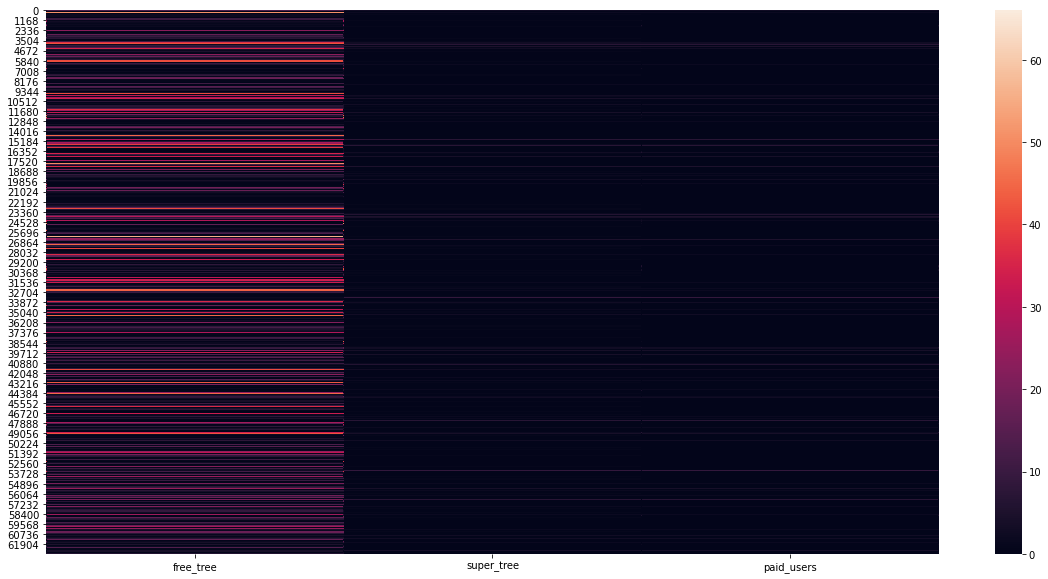

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(funnel_table[['free_tree','super_tree','paid_users']])